# Classification de séquences par réseaux récurrents
Objectif : classification de données binaires (avis positifs/négatifs sur des films)

## Imports

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, LSTM, Dense


## Chargement des données
Base de données IMDB (avis positif/négatif sur les films). On ne s'intéresse qu'aux 10000 mots les plus courants. On charge également la correspondance mot-> identifiant (id)

In [3]:
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)
word_index = imdb.get_word_index()

On créé une correspondance inverse id->mot en ajoutant des mots spéciaux

In [4]:
index = {word_id + 3: word for word, word_id in word_index.items()}
index[0] = "<pad>" # padding
index[1] = "<sos>" # début de séquence
index[2] = "<oov>" # hors vocabulaire
index[3] = "<unk>" # inconnu

Fonction de lecture des avis

In [7]:
def decode_review(word_ids):
    return " ".join([index.get(word_id, "<err>") for word_id in word_ids])

print("Un exemple d'avis : ",decode_review(X_train[10]))
print("Avis positif (1)/négatif (0) : ",y_train[1])

Un exemple d'avis :  <sos> french horror cinema has seen something of a revival over the last couple of years with great films such as inside and <oov> romance <oov> on to the scene <oov> <oov> the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made <oov> was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is <oov> by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named <oov> sent to prison for fraud he is put in a cell with three others the quietly insane <oov> body building <oov> marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old <oov> after <oov> part of it they soon realise its magical powers and realise they may

## Modèle de référence
Pour évaluer le modèle RNN, on construit un modèle de référence sur lequel comparer les résultats. Le code vous est fourni

In [8]:
X_train_text = [decode_review(words_ids) for words_ids in X_train]
X_test_text = [decode_review(words_ids) for words_ids in X_test]

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

In [10]:
processing = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', SGDClassifier(max_iter=50)),])

In [11]:
processing.fit(X_train_text, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(max_iter=50))])

In [12]:
print("Précision du modèle de référence : ",processing.score(X_test_text, y_test))
print("Test du modèle (avis 0 attendu ) : ", processing.predict(["this movie was really awful"]))
print("Test du modèle (avis 1 attendu ) : ", processing.predict(["this movie was really fantastic"]))

Précision du modèle de référence :  0.88488
Test du modèle (avis 0 attendu ) :  [0]
Test du modèle (avis 1 attendu ) :  [1]


## Classification de séquences par réseau récurrent

In [13]:
maxlen = 500
#TODO pas sequences

In [14]:
#TODO réseau

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 10)          100000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                5504      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 105,537
Trainable params: 105,537
Non-trainable params: 0
_________________________________________________________________


In [16]:
#TODO compilation

In [17]:
history = model.fit(X_train_trim, y_train,epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 27s 171ms/step - loss: 0.5583 - accuracy: 0.7193 - val_loss: 0.3823 - val_accuracy: 0.8500
Epoch 2/10
157/157 [==============================] - 24s 153ms/step - loss: 0.3414 - accuracy: 0.8650 - val_loss: 0.5075 - val_accuracy: 0.7920
Epoch 3/10
157/157 [==============================] - 24s 154ms/step - loss: 0.2697 - accuracy: 0.8965 - val_loss: 0.3065 - val_accuracy: 0.8754
Epoch 4/10
157/157 [==============================] - 24s 156ms/step - loss: 0.2258 - accuracy: 0.9169 - val_loss: 0.3231 - val_accuracy: 0.8596
Epoch 5/10
157/157 [==============================] - 25s 156ms/step - loss: 0.1971 - accuracy: 0.9283 - val_loss: 0.3242 - val_accuracy: 0.8770
Epoch 6/10
157/157 [==============================] - 25s 157ms/step - loss: 0.1772 - accuracy: 0.9359 - val_loss: 0.3094 - val_accuracy: 0.8806
Epoch 7/10
157/157 [==============================] - 25s 158ms/step - loss: 0.1581 - accuracy: 0.9427 - val_loss: 0.3119 - val_ac

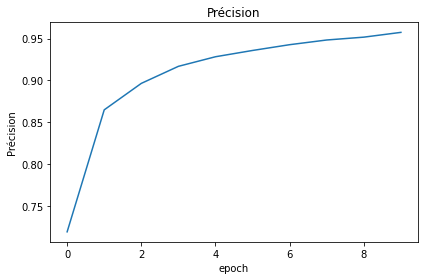

In [22]:
plt.plot(history.history['accuracy'])
plt.title('Précision')
plt.ylabel('Précision')
plt.xlabel('epoch')
plt.tight_layout()

In [28]:
model.evaluate(X_test_trim, y_test)
print("Test du modèle (avis 0 attendu ) : ", processing.predict(["this movie was really awful"]))
print("Test du modèle (avis 1 attendu ) : ", processing.predict(["this movie was really fantastic"]))

782/782 [==============================] - 16s 21ms/step - loss: 0.4244 - accuracy: 0.8666
Test du modèle (avis 0 attendu ) :  [0]
Test du modèle (avis 1 attendu ) :  [1]


## Utilisation d'un réseau bidirectionnel

In [29]:
from tensorflow.keras.layers import Dropout, Bidirectional

#TODO bidirectionnel

In [30]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [31]:
history = model.fit(X_train_trim, y_train,epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 42s 265ms/step - loss: 0.6204 - accuracy: 0.6676 - val_loss: 0.4662 - val_accuracy: 0.8162
Epoch 2/10
157/157 [==============================] - 36s 228ms/step - loss: 0.4085 - accuracy: 0.8312 - val_loss: 0.3565 - val_accuracy: 0.8652
Epoch 3/10
157/157 [==============================] - 36s 231ms/step - loss: 0.3231 - accuracy: 0.8726 - val_loss: 0.3264 - val_accuracy: 0.8696
Epoch 4/10
157/157 [==============================] - 50s 319ms/step - loss: 0.2714 - accuracy: 0.8932 - val_loss: 0.3123 - val_accuracy: 0.8788
Epoch 5/10
157/157 [==============================] - 42s 267ms/step - loss: 0.2457 - accuracy: 0.9060 - val_loss: 0.2914 - val_accuracy: 0.8846
Epoch 6/10
157/157 [==============================] - 44s 279ms/step - loss: 0.2211 - accuracy: 0.9175 - val_loss: 0.2642 - val_accuracy: 0.8942
Epoch 7/10
157/157 [==============================] - 41s 263ms/step - loss: 0.2139 - accuracy: 0.9205 - val_loss: 0.2875 - val_ac

In [33]:
model.evaluate(X_test_trim, y_test)
print("Test du modèle (avis 0 attendu ) : ", processing.predict(["this movie was really awful"]))
print("Test du modèle (avis 1 attendu ) : ", processing.predict(["this movie was really fantastic"]))

782/782 [==============================] - 20s 25ms/step - loss: 0.3317 - accuracy: 0.8820
Test du modèle (avis 0 attendu ) :  [0]
Test du modèle (avis 1 attendu ) :  [1]
